# Seaborn Basics

Step 0 — Load Data

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("student_scores.csv")

# Show first few rows
df.head()

,StudentID,Math,Science,English,Average,Performance
0,S001,74,76,51,67.000000,Average
1,S002,56,72,60,62.666667,Average
2,S003,58,90,70,72.666667,Average
3,S004,73,81,92,82.000000,Good
4,S005,50,83,96,76.333333,Good


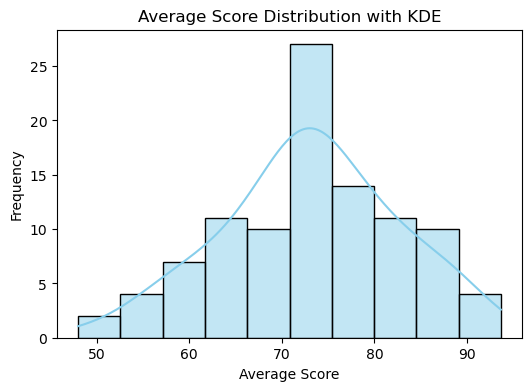

In [17]:
plt.figure(figsize=(6,4))
sns.histplot(df["Average"], kde=True, color="skyblue", bins=10)
plt.title("Average Score Distribution with KDE")
plt.xlabel("Average Score")
plt.ylabel("Frequency")
plt.show()

2. Count Plot – Performance Categories

C:\Users\User\AppData\Local\Temp\ipykernel_6524\354829589.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Performance", data=df, palette="pastel", legend=False)


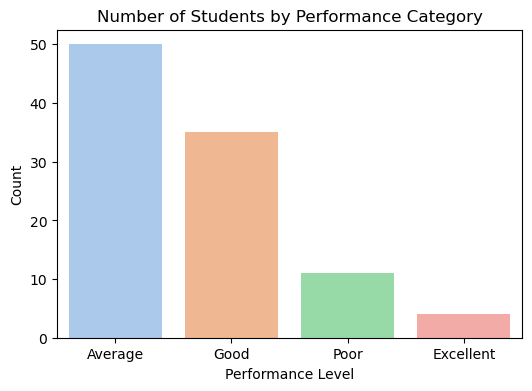

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(x="Performance", data=df, palette="pastel", legend=False)
plt.title("Number of Students by Performance Category")
plt.xlabel("Performance Level")
plt.ylabel("Count")
plt.show()

3. Bar Plot – Average score by performance

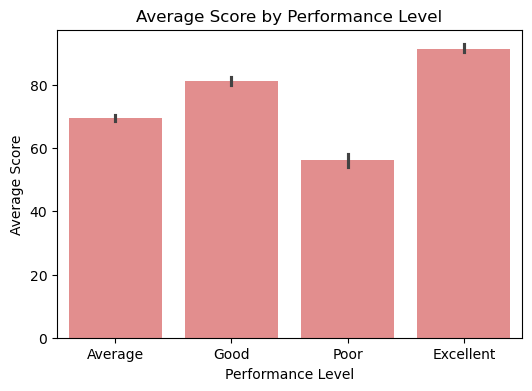

In [19]:
plt.figure(figsize=(6,4))
sns.barplot(x="Performance", y="Average", data=df, color="lightcoral")
plt.title("Average Score by Performance Level")
plt.xlabel("Performance Level")
plt.ylabel("Average Score")
plt.show()

4. Scatter Plot – Math vs Science Scores

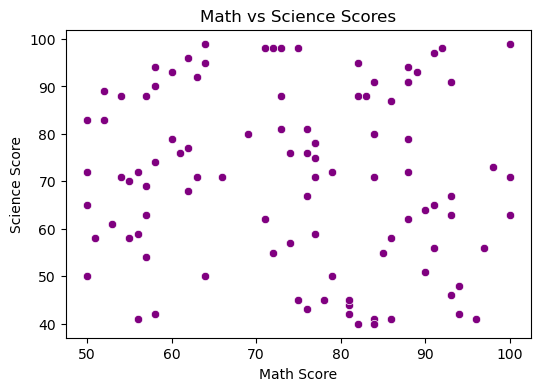

In [20]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="Math", y="Science", data=df, color="purple")
plt.title("Math vs Science Scores")
plt.xlabel("Math Score")
plt.ylabel("Science Score")
plt.show()

5. Box Plot – Average scores per performance group

C:\Users\User\AppData\Local\Temp\ipykernel_6524\2258349531.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Performance", y="Average", data=df, palette="coolwarm", legend=False)


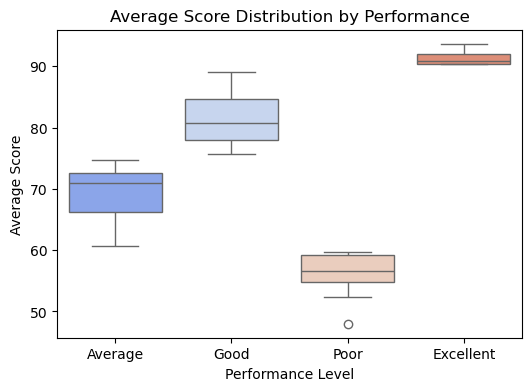

In [21]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Performance", y="Average", data=df, palette="coolwarm", legend=False)
plt.title("Average Score Distribution by Performance")
plt.xlabel("Performance Level")
plt.ylabel("Average Score")
plt.show()

# Student Scores Dataset

1. Histogram + KDE
Create a histogram with KDE for Math scores.

Use bins=8.

Change the color to "orange".

Add title "Distribution of Math Scores".

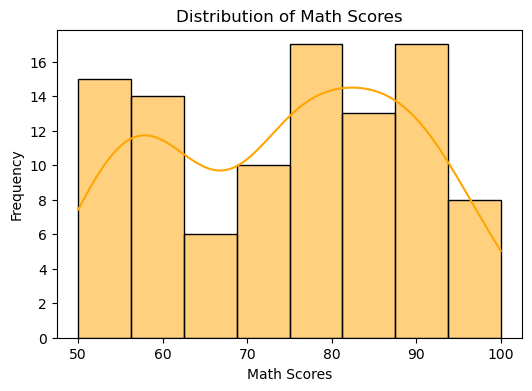

In [26]:
plt.figure(figsize = (6,4))
sns.histplot(df['Math'], kde=True, color='orange', bins=8)
plt.title('Distribution of Math Scores')
plt.xlabel('Math Scores')
plt.ylabel('Frequency')
plt.show()

2. Count Plot with Hue
Show the number of students per Performance category, but separate bars by whether English score is above or below 70.

Hint: Create a new column "EnglishLevel" = "High" if English > 70, else "Low".

Use palette="Set2".

2.1 Grouped bars (Seaborn countplot with hue)

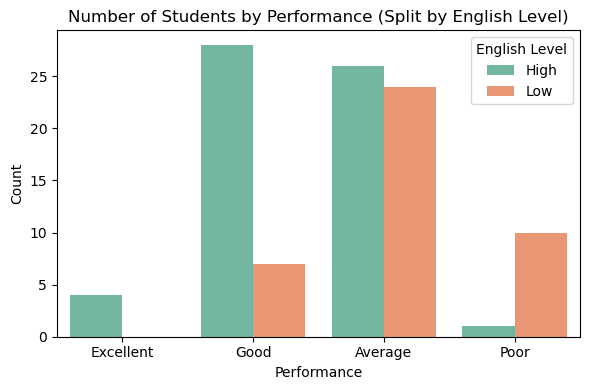

In [38]:
df['EnglishLevel'] = np.where(df['English']>70, 'High', 'Low')
plt.figure(figsize=(6,4))
sns.countplot(x='Performance', data = df, palette = 'Set2', hue='EnglishLevel', order=['Excellent', 'Good', 'Average', 'Poor'], hue_order=['High', 'Low'])
plt.title('Number of Students by Performance (Split by English Level)')
plt.xlabel('Performance')
plt.ylabel('Count')
plt.legend(title='English Level')
plt.tight_layout()
plt.show()

2.2 Annotated grouped bars — add counts above each bar

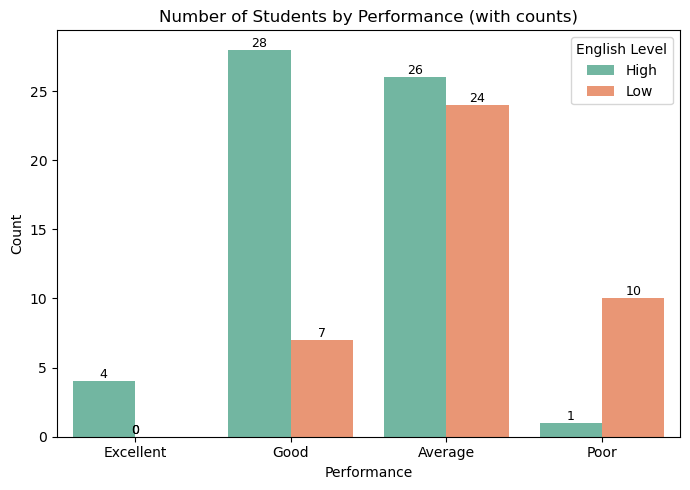

In [43]:
plt.figure(figsize=(7,5))
ax = sns.countplot(x='Performance', hue='EnglishLevel', data = df, palette = 'Set2', order= ['Excellent', 'Good', 'Average', 'Poor'], hue_order=['High', 'Low'])

# annotate counts
for p in ax.patches:
    height = int(p.get_height())
    # center text on the bar
    ax.annotate(height, (p.get_x() + p.get_width()/2, height), ha='center', va='bottom',fontsize=9)
    

plt.title('Number of Students by Performance (with counts)')
plt.xlabel('Performance')
plt.ylabel('Count')
plt.legend(title='English Level')
plt.tight_layout()
plt.show()


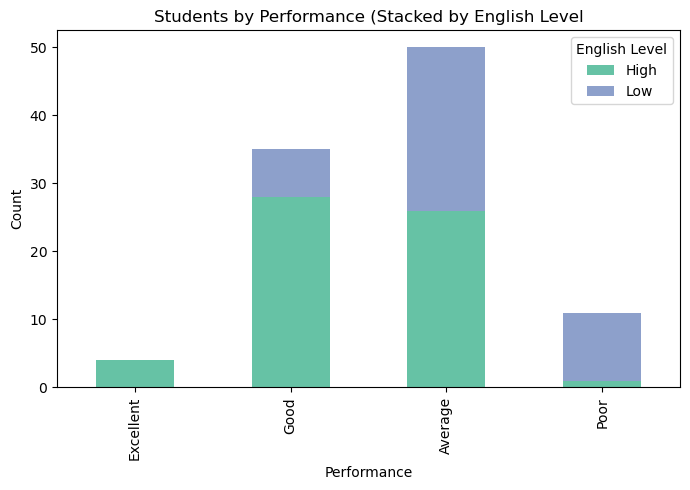

In [48]:
# crosstab (rows = Performance, columns = EnglishLevel)
ct = pd.crosstab(df['Performance'], df['EnglishLevel'])

# ensure ordering
ct = ct.reindex(index = ['Excellent', 'Good', 'Average', 'Poor'], columns=['High','Low']).fillna(0)

# stacked plt
ax = ct.plot(kind = 'bar', stacked = 'True', figsize=(7,5), color=['#66c2a5','#8da0cb'])
plt.title('Students by Performance (Stacked by English Level')
plt.xlabel('Performance')
plt.ylabel('Count')
plt.legend(title='English Level')
plt.tight_layout()
plt.show()

2.4 Stacked bar with percentages (often clearer)

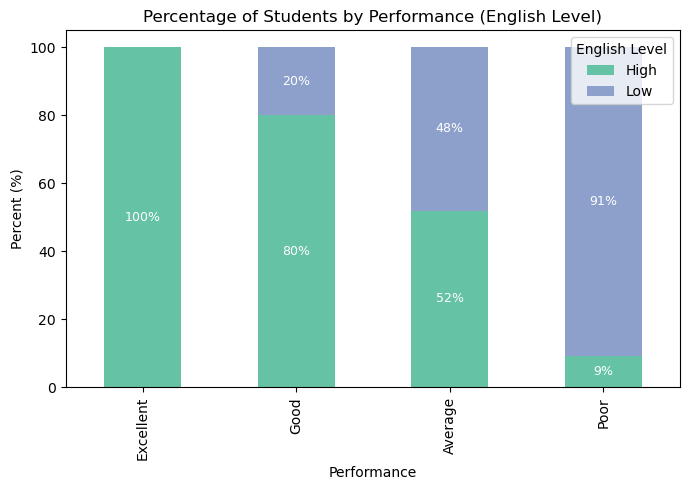

In [49]:
ct_percent = ct.div(ct.sum(axis=1), axis=0) *100 #convert counts to row-wise percent
ax = ct_percent.plot(kind='bar', stacked=True, figsize=(7,5), color=['#66c2a5','#8da0cb'])
plt.title('Percentage of Students by Performance (English Level)')
plt.xlabel('Performance')
plt.ylabel('Percent (%)')

# annotate percent labels in each stacked segment
for i, (idx, row) in enumerate(ct_percent.iterrows()):
    cum = 0
    for j, val in enumerate(row):
        if val>0:
            ax.text(i, cum+val/2, f"{val:.0f}%", ha = 'center', va='center', color='white',fontsize=9)
        cum+=val

plt.legend(title='English Level', loc = 'upper right')
plt.tight_layout()
plt.show()

3. Multiple Bar Plot
Plot average Math score for each Performance category, and use Science score as hue.

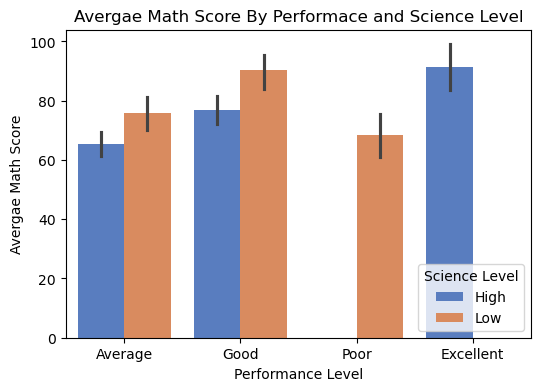

In [51]:
# create ScienceLevel column
df['ScienceLevel'] = np.where(df['Science']>70,'High','Low')

# Plot
plt.figure(figsize=(6,4))
sns.barplot(x='Performance', y='Math', hue='ScienceLevel', data=df, palette = 'muted')
plt.title('Avergae Math Score By Performace and Science Level')
plt.xlabel('Performance Level')
plt.ylabel('Avergae Math Score')
plt.legend(title='Science Level')
plt.show()


4. Scatter Plot with Size
Plot Math vs English scores, but use Average as the dot size.

Use sns.scatterplot(..., size="Average", sizes=(20,200)).

Set palette="coolwarm" and hue="Performance".

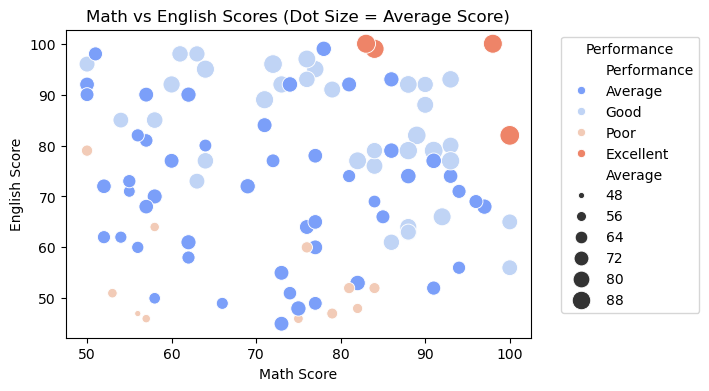

In [53]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Math', y='English', size='Average', sizes=(20,200), hue='Performance',palette='coolwarm', data=df)
plt.title('Math vs English Scores (Dot Size = Average Score)')
plt.xlabel('Math Score')
plt.ylabel('English Score')
plt.legend(title='Performance', bbox_to_anchor = (1.05,1), loc='upper left')
plt.show()

5. Box Plot + Swarm Plot
Plot box plots of Science scores by Performance, and overlay with swarm plots for individual student points.

C:\Users\User\AppData\Local\Temp\ipykernel_6524\3741403643.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Performance', y='Science', data=df, palette='coolwarm', legend=False)


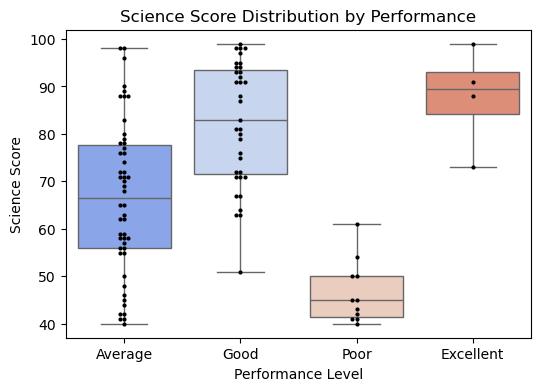

In [54]:
plt.figure(figsize=(6,4))

# Box Plot
sns.boxplot(x='Performance', y='Science', data=df, palette='coolwarm', legend=False)

#Swarm Plot Overlay
sns.swarmplot(x='Performance', y='Science', data=df, color='black', size=3)

plt.title('Science Score Distribution by Performance')
plt.xlabel('Performance Level')
plt.ylabel('Science Score')
plt.show()